# Machine Learning Project
# Real Estate Data Set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from pandas import ExcelWriter
from pandas import ExcelFile
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv("Real estate valuation data set.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [3]:
print (df.columns)

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')


In [4]:
data= df.iloc[:,1:-1]
data.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245


In [5]:
price = df["Y house price of unit area"]
price.shape

(414,)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
...     data, price, test_size=0.30, random_state=42)
y_train.shape
print(X_train)

     X1 transaction date  X2 house age  \
7               2013.417          20.3   
194             2013.500          15.2   
19              2012.667           1.5   
176             2012.833          13.9   
367             2012.833          15.0   
304             2013.417          20.0   
198             2013.083          34.0   
145             2012.917           2.1   
265             2012.833          15.7   
109             2013.583           4.0   
202             2012.917          38.3   
196             2013.000          22.8   
396             2012.667          37.1   
239             2013.500          18.1   
83              2012.917          25.3   
168             2013.083          27.6   
323             2013.417          28.6   
74              2012.917           6.8   
383             2012.667          29.1   
119             2013.500          16.6   
209             2012.833          34.8   
219             2012.750          29.3   
153             2013.250          

In [7]:
regression = DecisionTreeRegressor()
meany=np.mean(y_train)
print(meany)
print((np.mean((meany-y_test.values)**2))**0.5)

38.44186851211073
13.021642241849854


In [8]:
regression.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [9]:
predictions=regression.predict(X_test)
print(predictions)
print(y_test.values)
print((np.mean((predictions-y_test.values)**2))**0.5) #root mean squared error, farklarin karelerinin ortalamasinin koku = standard deviation gibi birsey

[48.6  38.9  43.5  29.3  25.7  36.5  51.7  53.3  12.8  58.1  29.4  33.4
 48.   13.8  39.6  23.   40.6  55.2  21.8  40.6  14.4  20.9  43.1  36.3
 11.6  33.1  12.8  43.5  60.7  35.3  22.6  21.7  42.5  26.6  41.2  39.7
 52.7  15.9  36.5  60.7  61.5  44.2  39.7  37.4  39.3  47.9  42.5  23.8
 47.7  39.7  48.6  55.   42.3  37.5  37.4  15.9  38.1  22.8  25.7  51.7
 27.7  27.   15.9  13.2  15.   20.9  21.5  44.2  39.6  25.3  39.3  61.5
 55.2  36.9  34.2  26.5  46.4  26.9  40.2  31.1  37.8  42.1  21.5  67.7
 25.6  27.7  38.1  41.6  29.7  34.   20.5  37.5  42.75 45.9  40.6  34.2
 23.5  40.6  27.7  53.9  25.6  30.9  40.6  23.8  56.15 53.5  23.5  21.8
 37.5  37.8  36.2  29.3  43.2  41.6  22.   55.2  51.7  39.7  25.3  30.1
 40.6  18.2  69.7  54.4  46.4 ]
[45.1 42.3 52.2 37.3 22.8 36.3 53.  51.4 16.1 59.  30.6 30.7 35.6 13.7
 62.9 30.5 41.9 54.4 29.5 43.7 12.2 22.1 49.5 47.4 18.6 28.5 14.7 45.4
 41.  35.1 22.1 28.9 30.5 26.5 49.3 37.  56.3 15.4 48.5 63.3 50.5 42.2
 37.9 37.5 40.5 57.4 26.5 21.8 49.7

In [10]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=1)
neigh2 = KNeighborsRegressor(n_neighbors=10)
neigh.fit(X_train.iloc[:,:-2], y_train)   #Fit k-nn regressor using features other than latitude longtitude
neigh2.fit(X_train.iloc[:,-2:], y_train)  #Fit k-nn regressor using latitude longtitude

predictions1=neigh.predict(X_test.iloc[:,:-2])
predictions2=neigh2.predict(X_test.iloc[:,-2:])
predictions=(predictions1+predictions2)/2        #take average of the predictions
print(predictions)
print(y_test.values)
print((np.mean((predictions-y_test.values)**2))**0.5) #root mean squared error calculation
#take differences of the expected and the predicted values, square them, add them up, divide by the total number of examples, take square root
#farklarin karelerinin ortalamasinin koku = standard deviation gibi birsey

print((np.mean((predictions1-y_test.values)**2))**0.5) #root mean squared error of the first k-nn model
print((np.mean((predictions2-y_test.values)**2))**0.5) #root mean squared error of the second k-nn model





neigh3 = KNeighborsRegressor(n_neighbors=1)
neigh3.fit(X_train, y_train)   #Fit k-nn regressor using features other than latitude longtitude
predictions3=neigh3.predict(X_test)
print((np.mean((predictions3-y_test.values)**2))**0.5) #root mean squared error calculation


[48.96  39.155 45.45  38.4   26.845 37.54  45.98  50.78  22.585 56.38
 23.74  30.695 27.64  19.985 38.34  24.745 44.785 50.115 27.645 37.785
 15.85  23.34  48.355 46.825 17.59  40.3   21.97  45.45  48.64  44.705
 17.125 23.51  41.13  26.29  50.01  38.255 53.68  16.27  41.58  39.1
 41.965 40.825 46.705 40.375 40.955 53.05  35.365 20.945 48.92  46.705
 48.96  53.27  40.755 43.84  40.69  16.27  37.63  30.47  26.845 50.78
 28.295 28.785 16.27  18.025 16.365 23.34  26.29  36.875 42.52  25.64
 40.735 40.55  50.115 50.64  41.885 44.85  47.8   45.315 41.51  29.925
 38.34  45.98  27.19  47.805 26.32  28.295 39.205 39.265 28.895 38.215
 23.525 41.885 36.925 46.81  40.335 37.585 25.175 40.195 27.845 50.26
 24.59  43.455 34.015 24.635 49.615 54.08  24.11  21.235 41.885 47.8
 40.5   38.4   46.93  48.    23.095 49.035 50.78  43.38  26.27  28.04
 42.555 23.525 63.485 51.86  39.935]
[45.1 42.3 52.2 37.3 22.8 36.3 53.  51.4 16.1 59.  30.6 30.7 35.6 13.7
 62.9 30.5 41.9 54.4 29.5 43.7 12.2 22.1 49.5 47.

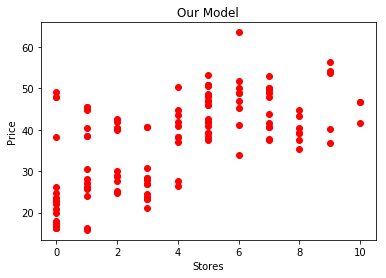

In [11]:
stores=X_test["X4 number of convenience stores"].values
plt.scatter(stores,predictions,color= "red")
plt.xlabel("Stores")
plt.ylabel("Price")
plt.title("Our Model")
plt.show()

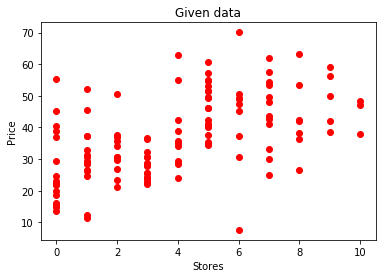

In [12]:
stores=X_test["X4 number of convenience stores"].values
plt.scatter(stores,y_test,color= "red")
plt.xlabel("Stores")
plt.ylabel("Price")
plt.title("Given data")
plt.show()